# Project

Group: 01 

Students: Alice Castro - 58563 | Daniela Gonçalves - 57261  | Filipa Machado - 58512

# Installs Needed

In [ ]:
#pip install geopandas
#pip install pycaret

# Imports Needed

In [2]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import geopandas as gpd
from pycaret.regression import *
from scipy.stats import chi2_contingency
from math import ceil
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
#read file
df = pd.read_csv('https://query.data.world/s/dn2bcctiz7xinobb7lkninzx2fuqw7')

# Data Preprocessing 

In [4]:
#checking number os records and type of every column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      7833 non-null   int64  
 1   host_name                    7833 non-null   object 
 2   host_since_year              7833 non-null   int64  
 3   host_since_anniversary       7833 non-null   object 
 4   id                           7833 non-null   int64  
 5   neighbourhood_cleansed       7833 non-null   object 
 6   city                         7833 non-null   object 
 7   state                        7825 non-null   object 
 8   zipcode                      7660 non-null   object 
 9   country                      7833 non-null   object 
 10  latitude                     7833 non-null   float64
 11  longitude                    7833 non-null   float64
 12  property_type                7833 non-null   object 
 13  room_type         

In [5]:
#after looking at the head of the dataset we already were able to notice some NaN values, 
#therefore need to examine missing values further before continuing with analysis

#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
df.isnull().sum()

host_id                           0
host_name                         0
host_since_year                   0
host_since_anniversary            0
id                                0
neighbourhood_cleansed            0
city                              0
state                             8
zipcode                         173
country                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        69
bedrooms                         14
beds                             13
bed_type                          0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
host_response_time              732
host_response_rate              732
number_of_reviews                 0
review_scores_rating           1698
review_scores_accuracy      

In [6]:
#replace NaN to medium values of columns using method .mean()
df['review_scores_rating'].fillna(value=df['review_scores_rating'].mean(), inplace=True)
df['review_scores_accuracy'].fillna(value=df['review_scores_accuracy'].mean(), inplace=True)
df['review_scores_cleanliness'].fillna(value=df['review_scores_cleanliness'].mean(), inplace=True)
df['review_scores_checkin'].fillna(value=df['review_scores_checkin'].mean(), inplace=True)
df['review_scores_communication'].fillna(value=df['review_scores_communication'].mean(), inplace=True)
df['review_scores_location'].fillna(value=df['review_scores_location'].mean(), inplace=True)
df['review_scores_value'].fillna(value=df['review_scores_value'].mean(), inplace=True)

df['host_response_rate'].fillna(value=df['host_response_rate'].mean(), inplace=True)

df['bathrooms'].fillna(value=df['bathrooms'].mean(), inplace=True)
df['bedrooms'].fillna(value=df['bedrooms'].mean(), inplace=True)
df['beds'].fillna(value=df['beds'].mean(), inplace=True)

In [7]:
#examing changes
df.isnull().sum()

host_id                          0
host_name                        0
host_since_year                  0
host_since_anniversary           0
id                               0
neighbourhood_cleansed           0
city                             0
state                            8
zipcode                        173
country                          0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
price                            0
guests_included                  0
extra_people                     0
minimum_nights                   0
host_response_time             732
host_response_rate               0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanl

In [8]:
#print all the columns names
df.columns

Index(['host_id', 'host_name', 'host_since_year', 'host_since_anniversary',
       'id', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'country',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'host_response_time',
       'host_response_rate', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [9]:
#number os columns
len(df.columns)

33

# Seaborn Correlation Heatmap

<AxesSubplot:>

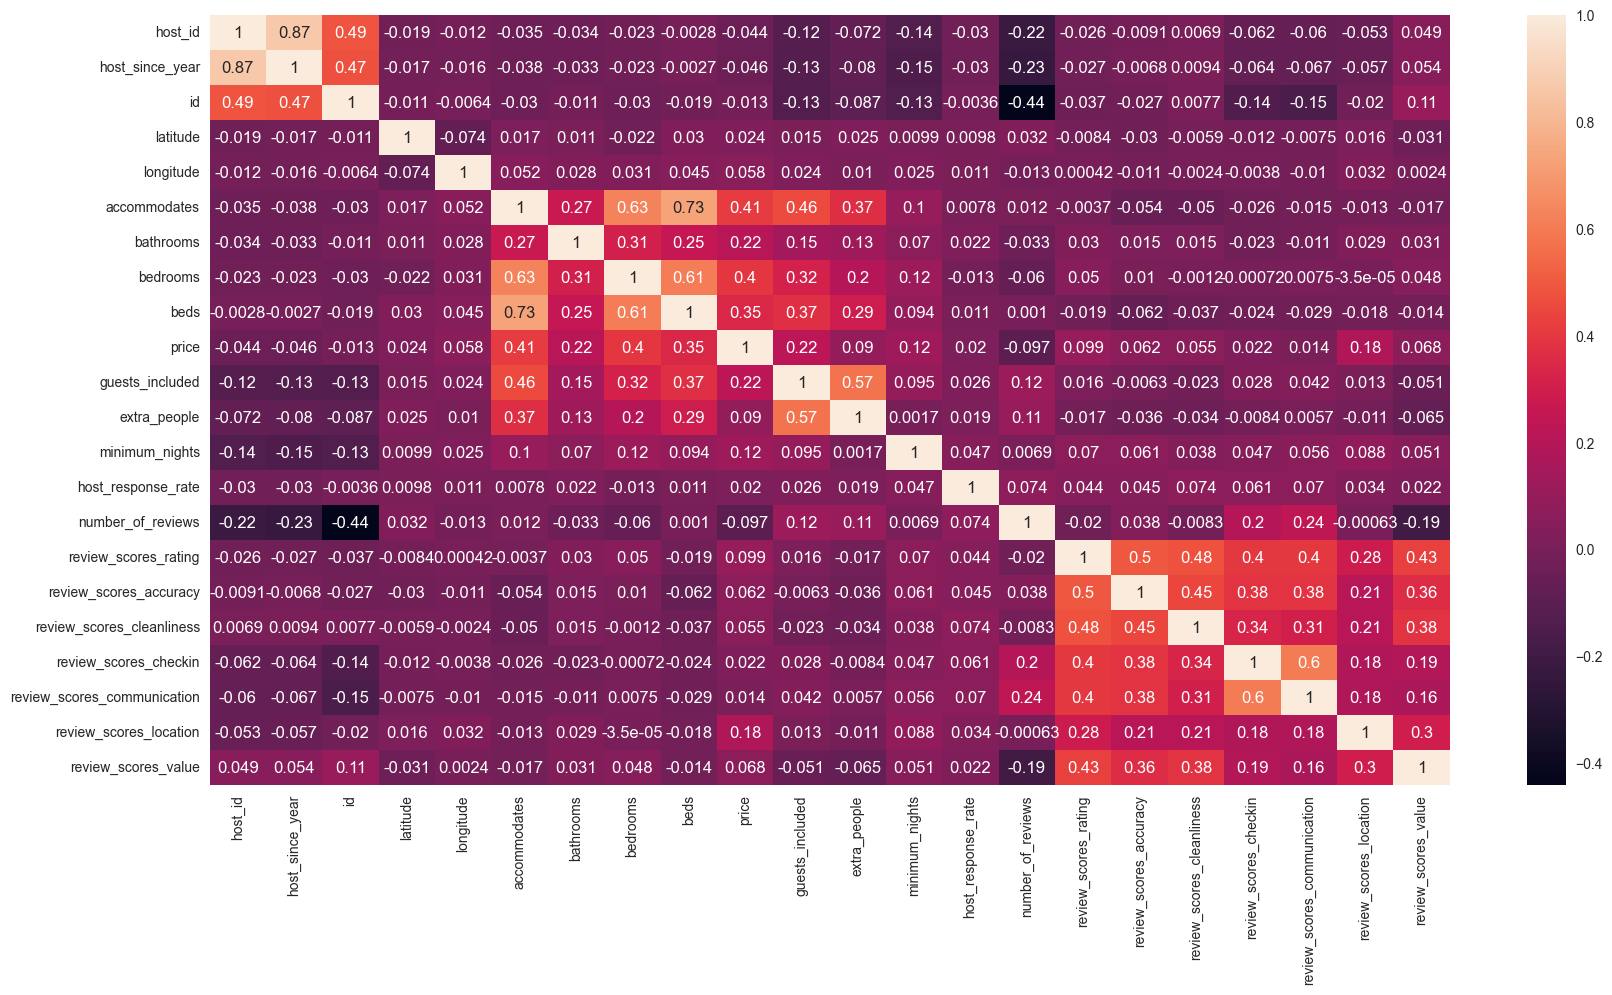

In [10]:
#get correlation between different variables
corr = df.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

# Histograms

array([[<AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'host_since_year'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'guests_included'}>,
        <AxesSubplot:title={'center':'extra_people'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'host_response_rate'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'review_scores_accuracy'}>,
        <AxesSubplot:title={'center':'review_scores_cleanliness'}>,
 

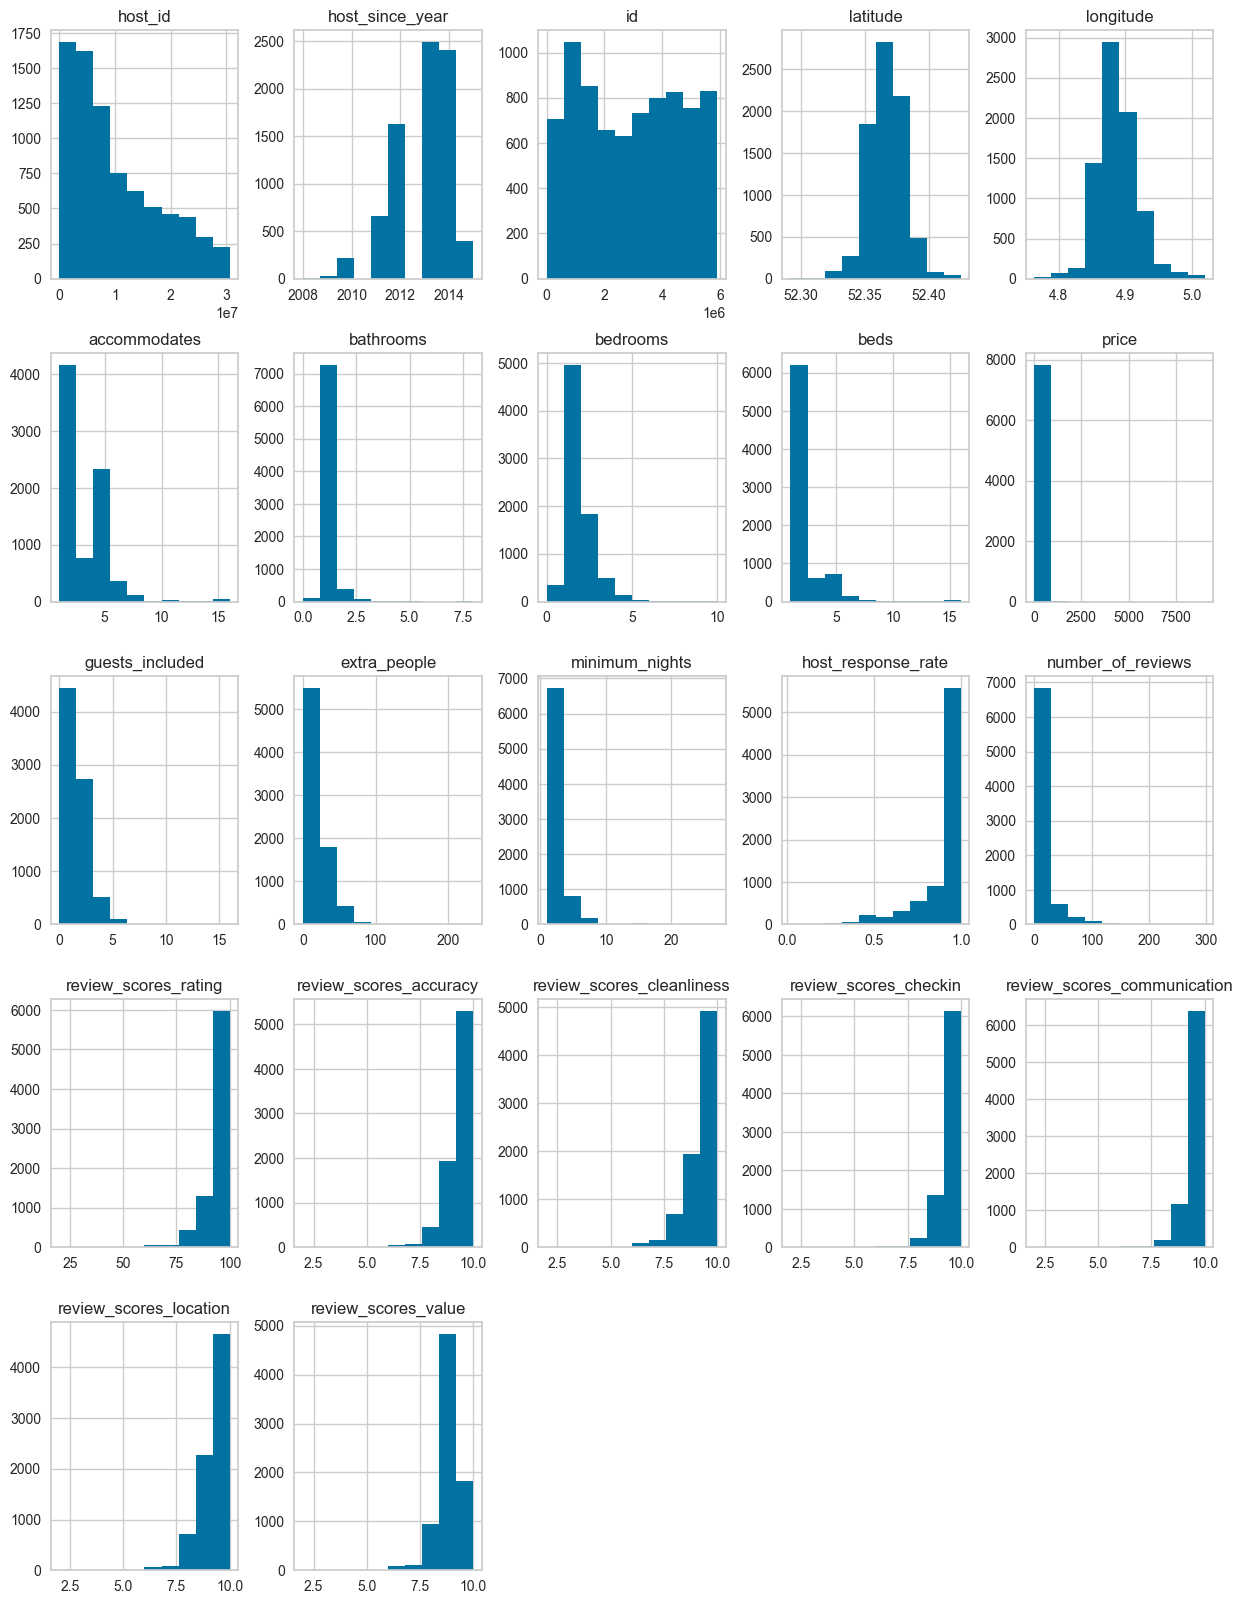

In [11]:
#histograms for each column
df.hist(figsize=(15, 20))  

# Scatter

<AxesSubplot:xlabel='price', ylabel='review_scores_rating'>

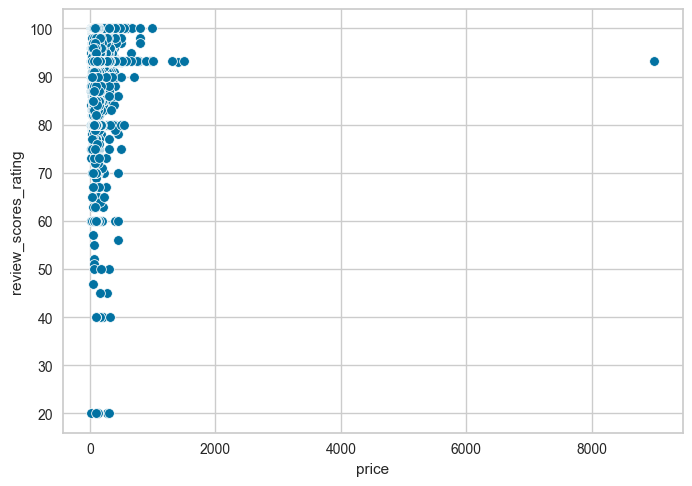

In [12]:
#scatter plot for price vs review scores rating
sns.scatterplot(x='price', y='review_scores_rating', data=df)

<AxesSubplot:xlabel='number_of_reviews', ylabel='review_scores_rating'>

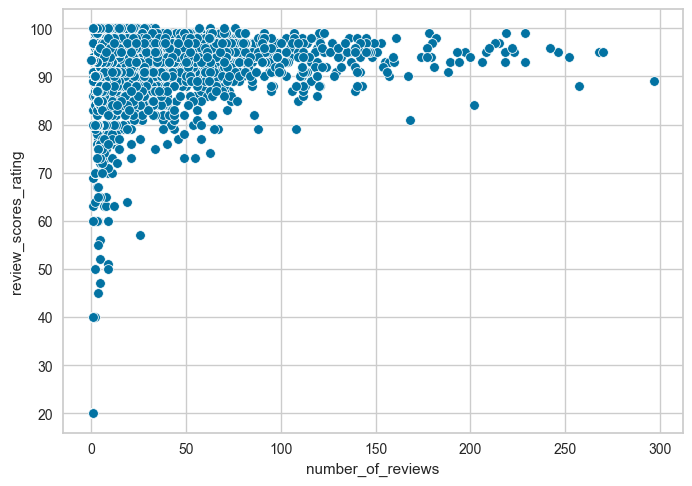

In [13]:
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', data=df)

# Box Plots

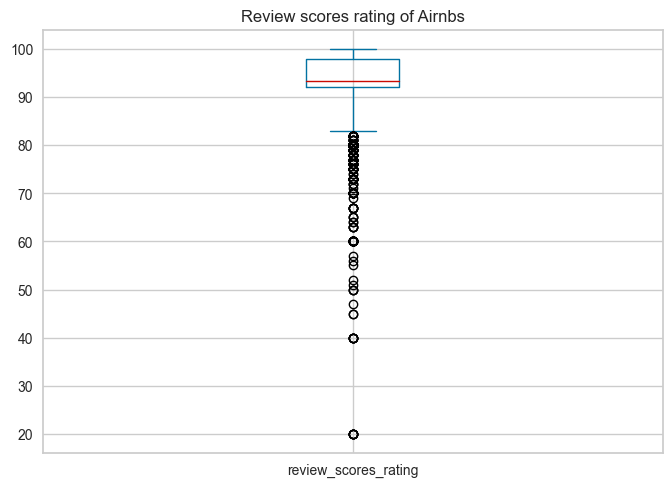

In [347]:
#box plot review scores rating of Airnbs
df['review_scores_rating'].plot(kind='box', title='Review scores rating of Airnbs')
plt.show()

In [348]:
#quartiles
df['review_scores_rating'].quantile([0.25, 0.5, 0.75])

0.25    92.000000
0.50    93.342298
0.75    98.000000
Name: review_scores_rating, dtype: float64

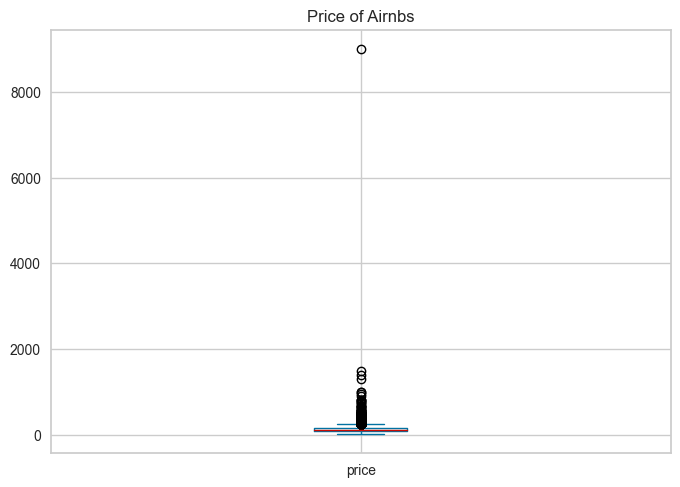

In [349]:
#box plot Price of Airnbs
df['price'].plot(kind='box', title='Price of Airnbs')
plt.show()

In [350]:
#quartiles
df['price'].quantile([0.25, 0.5, 0.75])

0.25     85.0
0.50    109.0
0.75    150.0
Name: price, dtype: float64

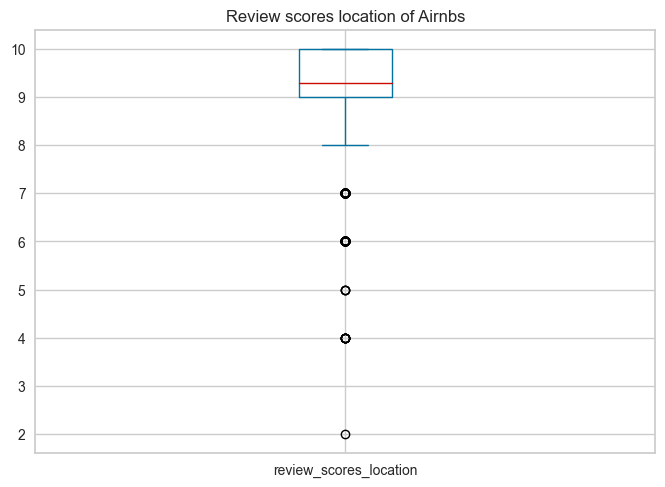

In [351]:
#box plot Review scores location of Airnbs
df['review_scores_location'].plot(kind='box', title='Review scores location of Airnbs')
plt.show()

In [352]:
#quartiles
df['review_scores_location'].quantile([0.25, 0.5, 0.75])

0.25     9.000000
0.50     9.292946
0.75    10.000000
Name: review_scores_location, dtype: float64

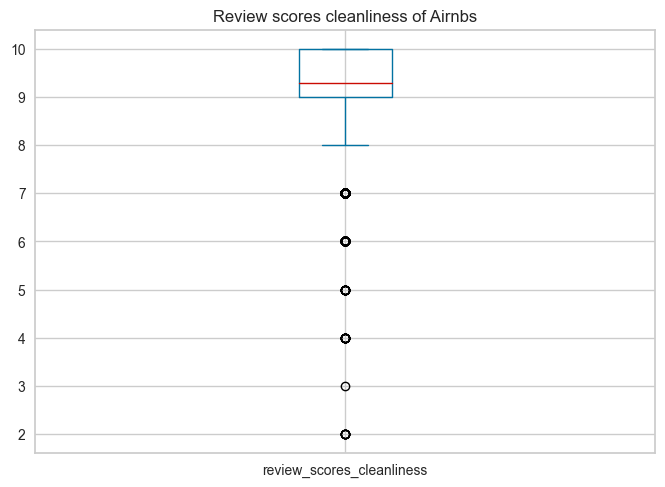

In [353]:
#box plot review scores cleanliness of Airnbs
df['review_scores_cleanliness'].plot(kind='box', title='Review scores cleanliness of Airnbs')
plt.show()

In [354]:
#quartiles
df['review_scores_cleanliness'].quantile([0.25, 0.5, 0.75])

0.25     9.000000
0.50     9.289517
0.75    10.000000
Name: review_scores_cleanliness, dtype: float64

# Graphics for Price

In [355]:
# Get the amsterdam city shapefile information
amsterdam = gpd.read_file('./geo_files/amsterdam.shp')
# Get the amsterdam city centre shapefile information
center = gpd.read_file('./geo_files/centro-polygon.shp')

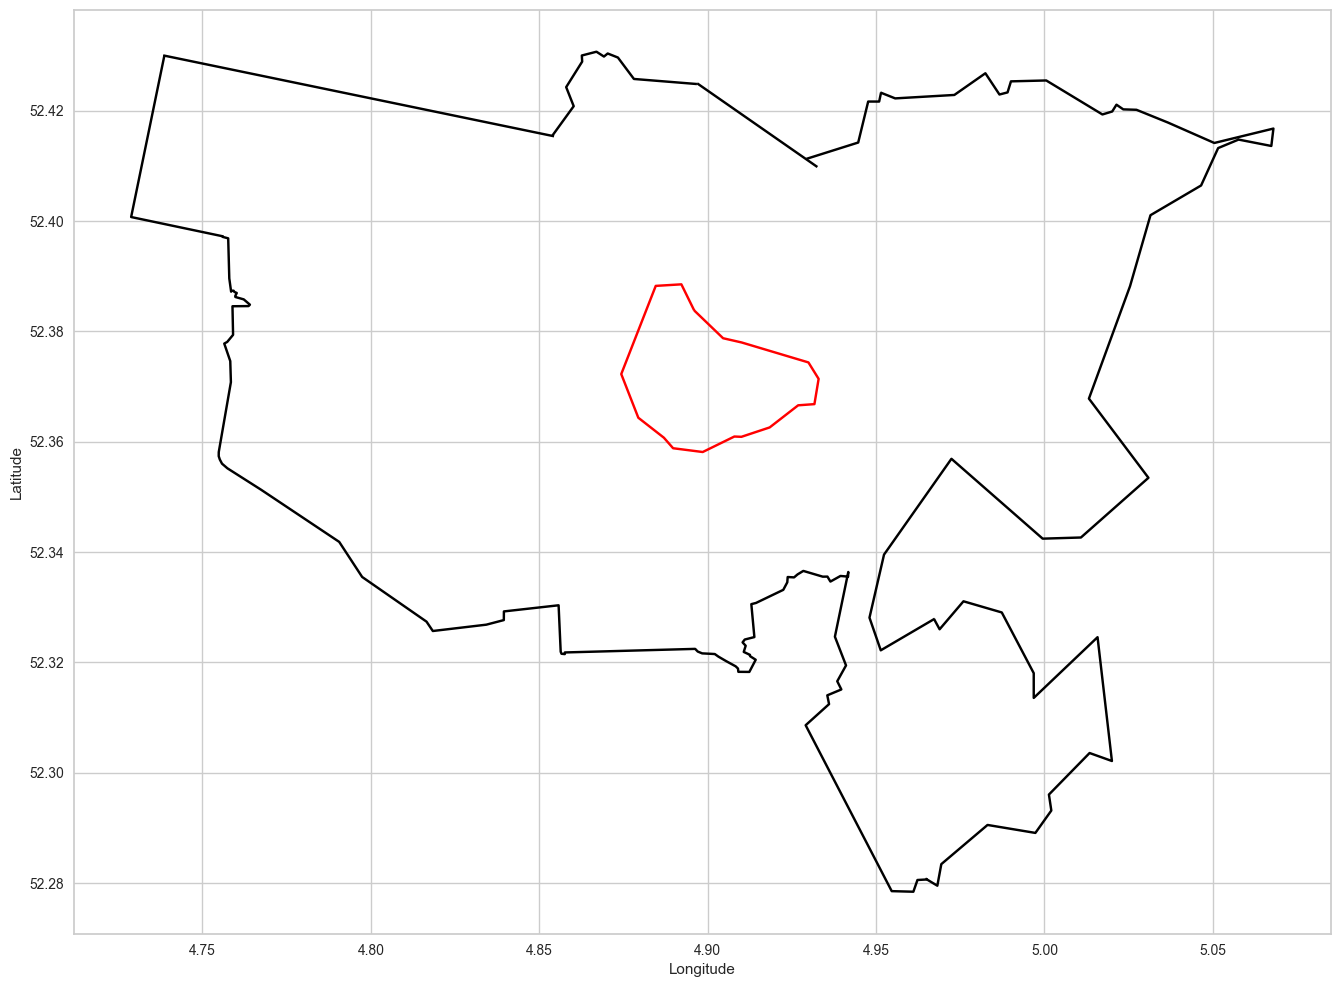

In [356]:
# designing amsterdam borders and city center borders
base = amsterdam.plot(figsize = (17 , 12), color='black', edgecolor='black')

center.exterior.plot(ax=base, color='red')

#set label for x-axis
base.set_xlabel("Longitude")
  
#set label for y-axis
base.set_ylabel("Latitude")

plt.show()

In [357]:
#To determinate the number of houses with a price above 1000
above1000 = df[df['price'] > 1000]

print(len(above1000))

4


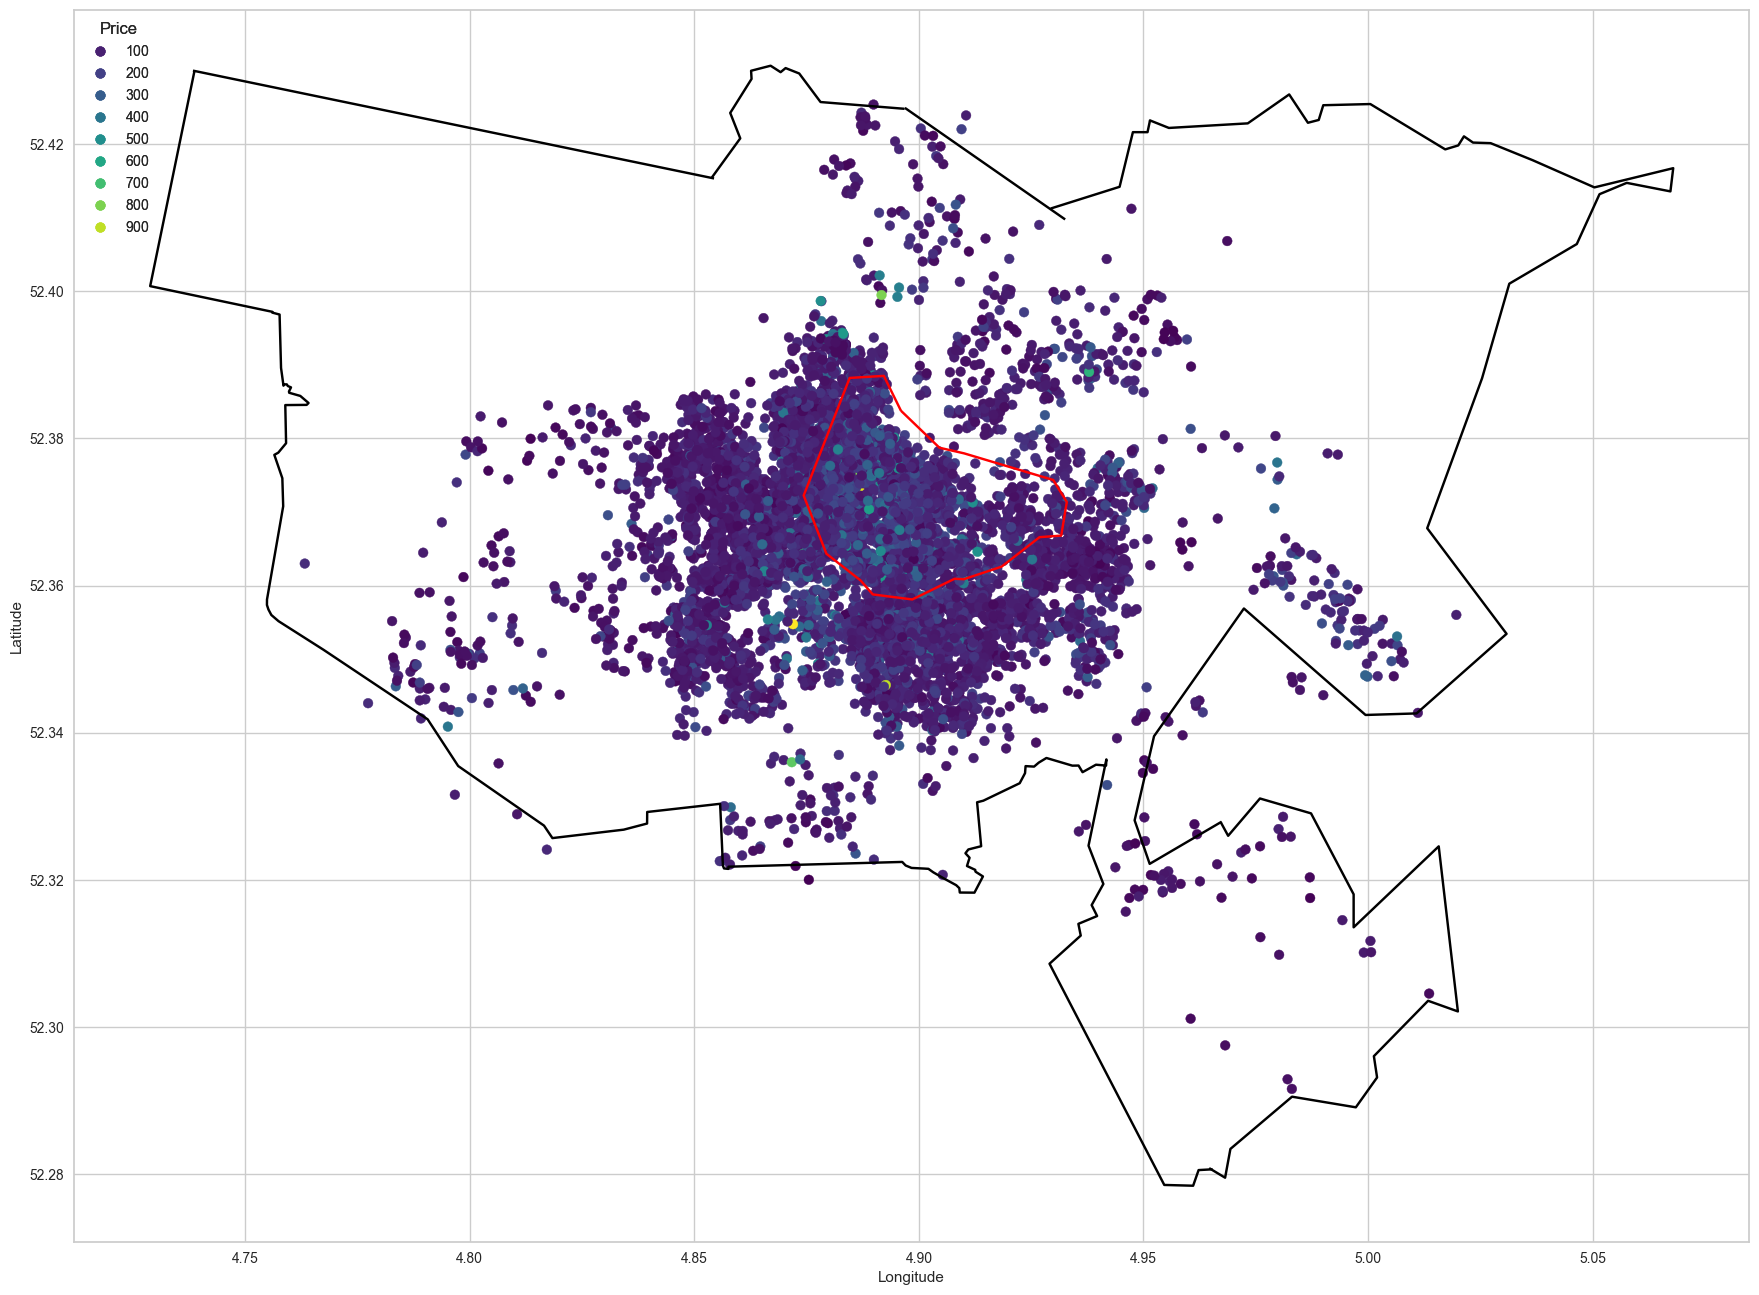

In [379]:
#The coordinates of the house with a value less 1000
base = amsterdam.plot(figsize = (25 , 16), color='black', edgecolor='black')

less1000 = df[df['price'] < 1000]

x = less1000['longitude']
y = less1000['latitude']
c = less1000['price']

scatter = base.scatter(x, y, c=c, cmap='viridis')

# produce a legend with the unique colors from the scatter
legend1 = base.legend(*scatter.legend_elements(),
                    loc="upper left", title="Price")
base.add_artist(legend1)

center.exterior.plot(ax=base, color='red')

#set label for x-axis
base.set_xlabel("Longitude")
  
#set label for y-axis
base.set_ylabel("Latitude")

plt.show()

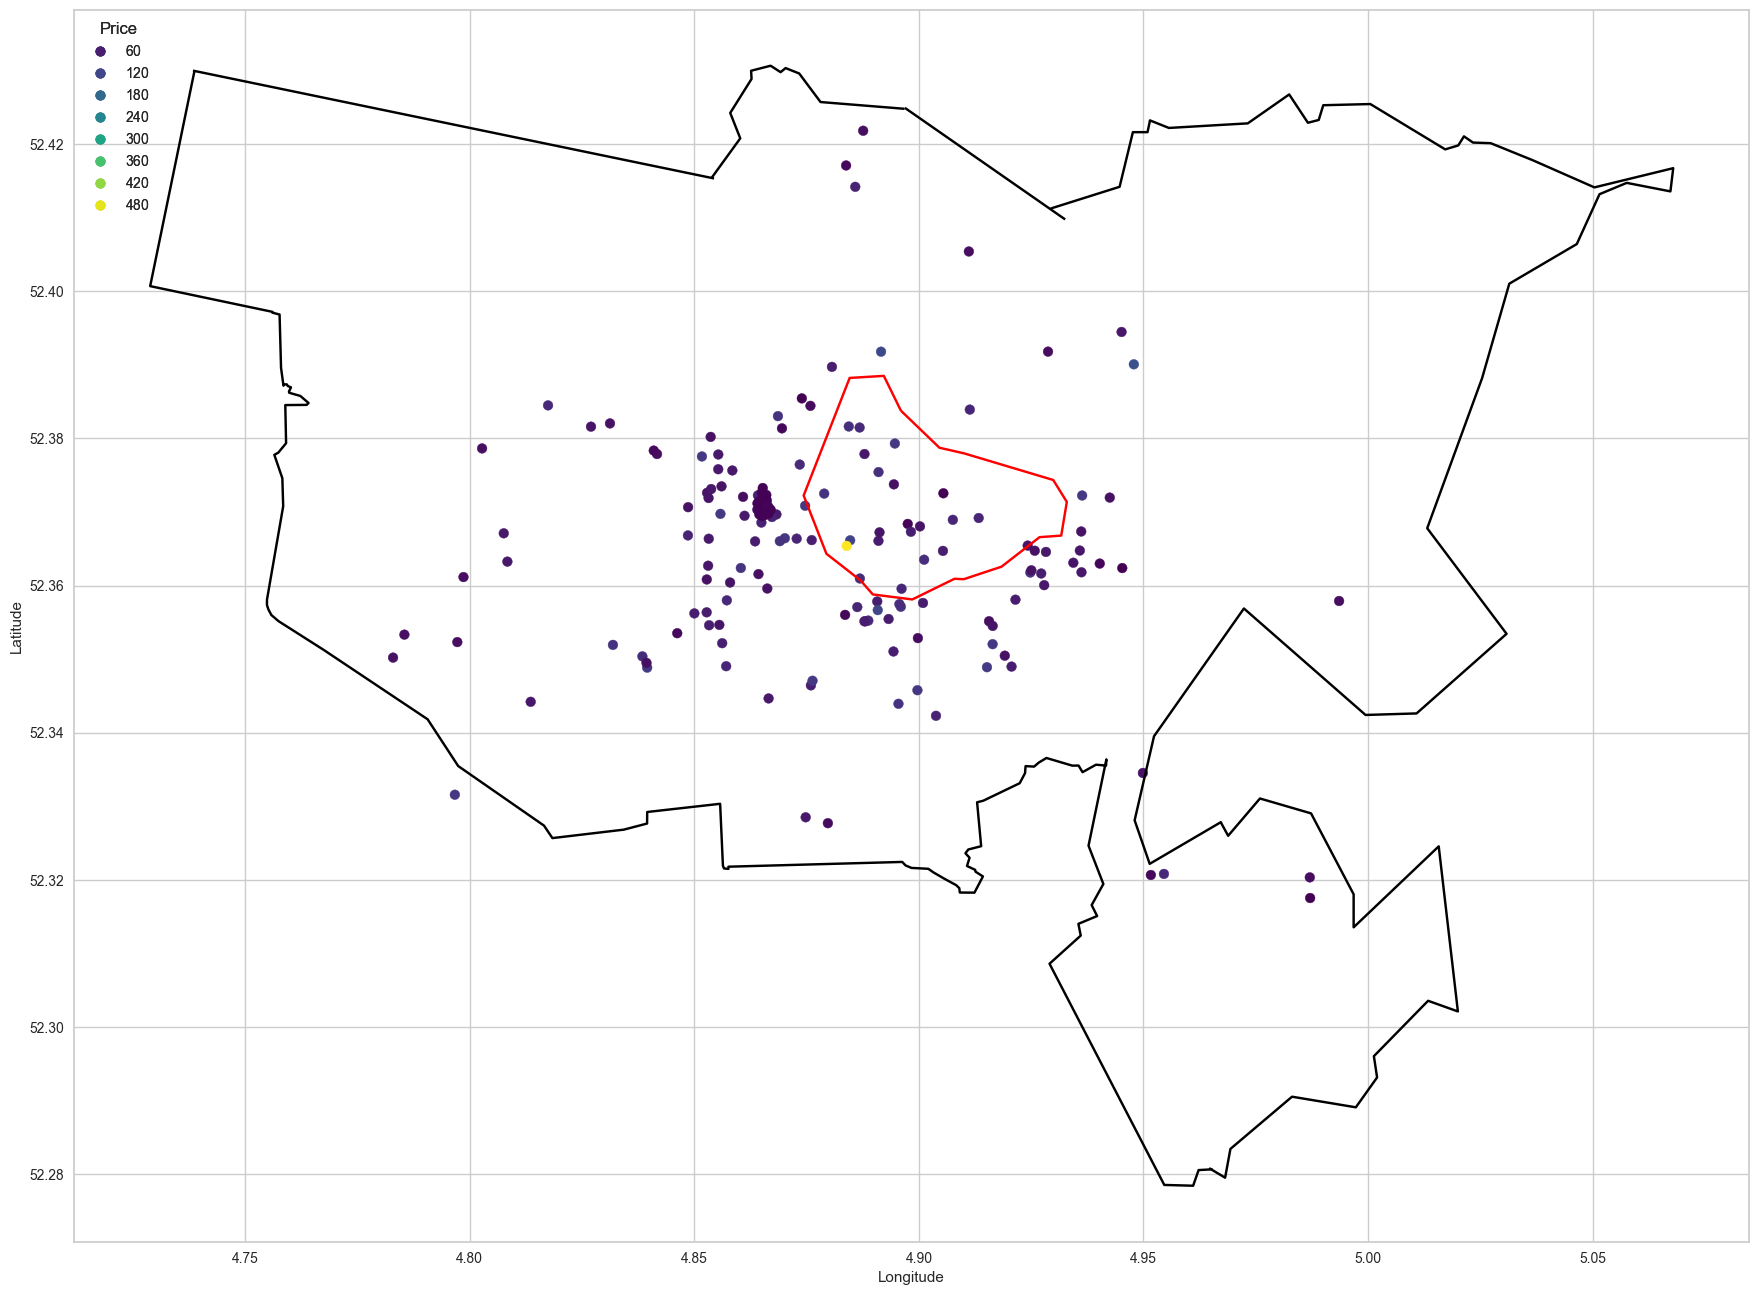

In [380]:
#The coordinates of the house that accommodates less than 2 people
base = amsterdam.plot(figsize = (25 , 16), color='black', edgecolor='black')

less2 = df[df['accommodates'] < 2]

x = less2['longitude']
y = less2['latitude']
c = less2['price']

scatter = base.scatter(x, y, c=c, cmap='viridis')

# produce a legend with the unique colors from the scatter
legend1 = base.legend(*scatter.legend_elements(),
                    loc="upper left", title="Price")
base.add_artist(legend1)

center.exterior.plot(ax=base, color='red')

#set label for x-axis
base.set_xlabel("Longitude")
  
#set label for y-axis
base.set_ylabel("Latitude")

plt.show()

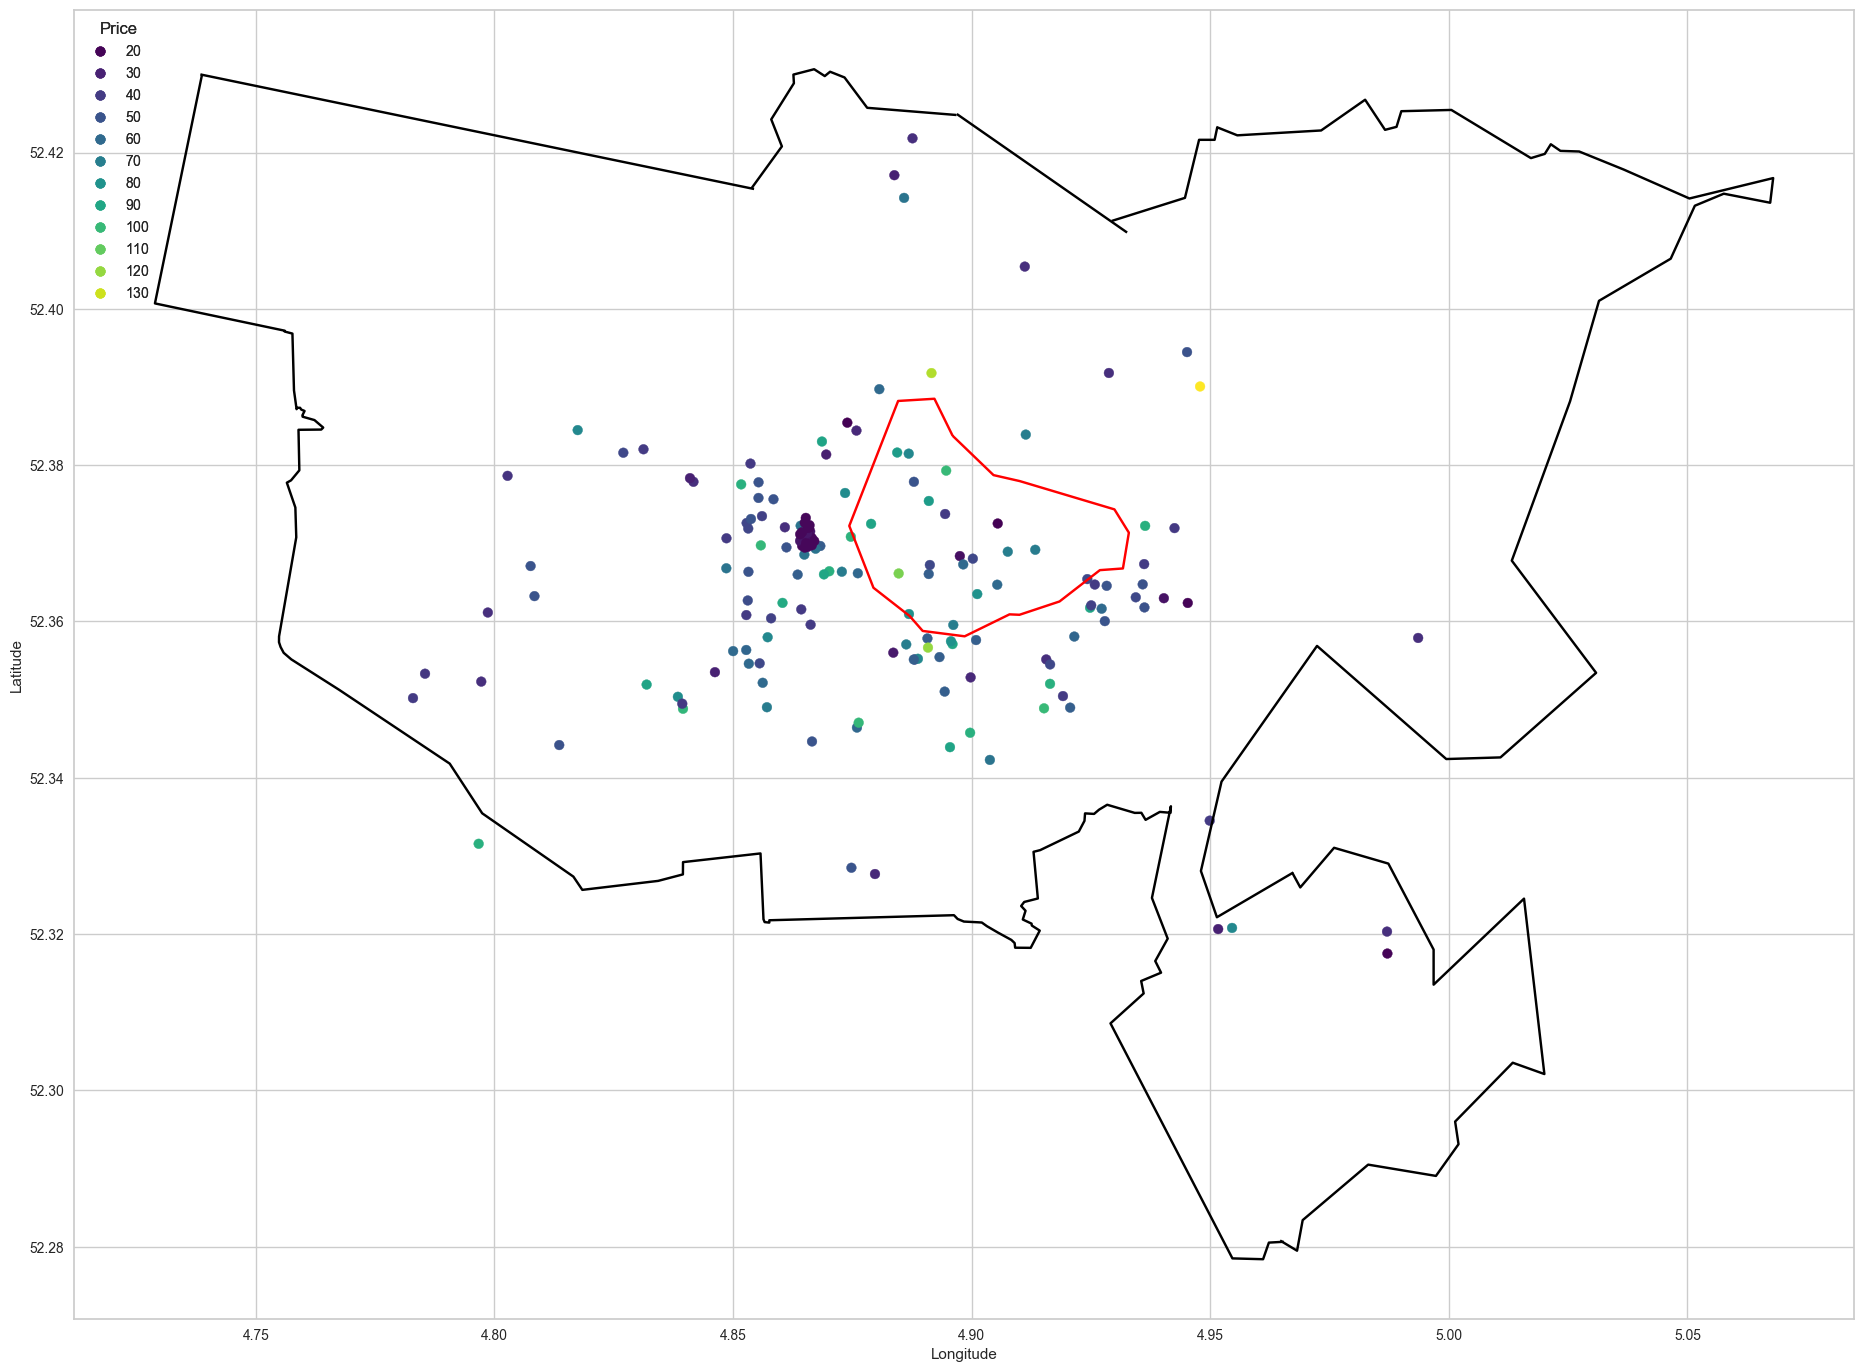

In [382]:
#The coordinates of the house that accommodates less than 2 people
base = amsterdam.plot(figsize = (25 , 17), color='black', edgecolor='black')

less2 = df[df['accommodates'] < 2]
less470 = less2[less2['price'] < 470]

x = less470['longitude']
y = less470['latitude']
c = less470['price']

scatter = base.scatter(x, y, c=c, cmap='viridis')

# produce a legend with the unique colors from the scatter
legend1 = base.legend(*scatter.legend_elements(),
                    loc="upper left", title="Price")
base.add_artist(legend1)

center.exterior.plot(ax=base, color='red')

#set label for x-axis
base.set_xlabel("Longitude")
  
#set label for y-axis
base.set_ylabel("Latitude")

plt.show()

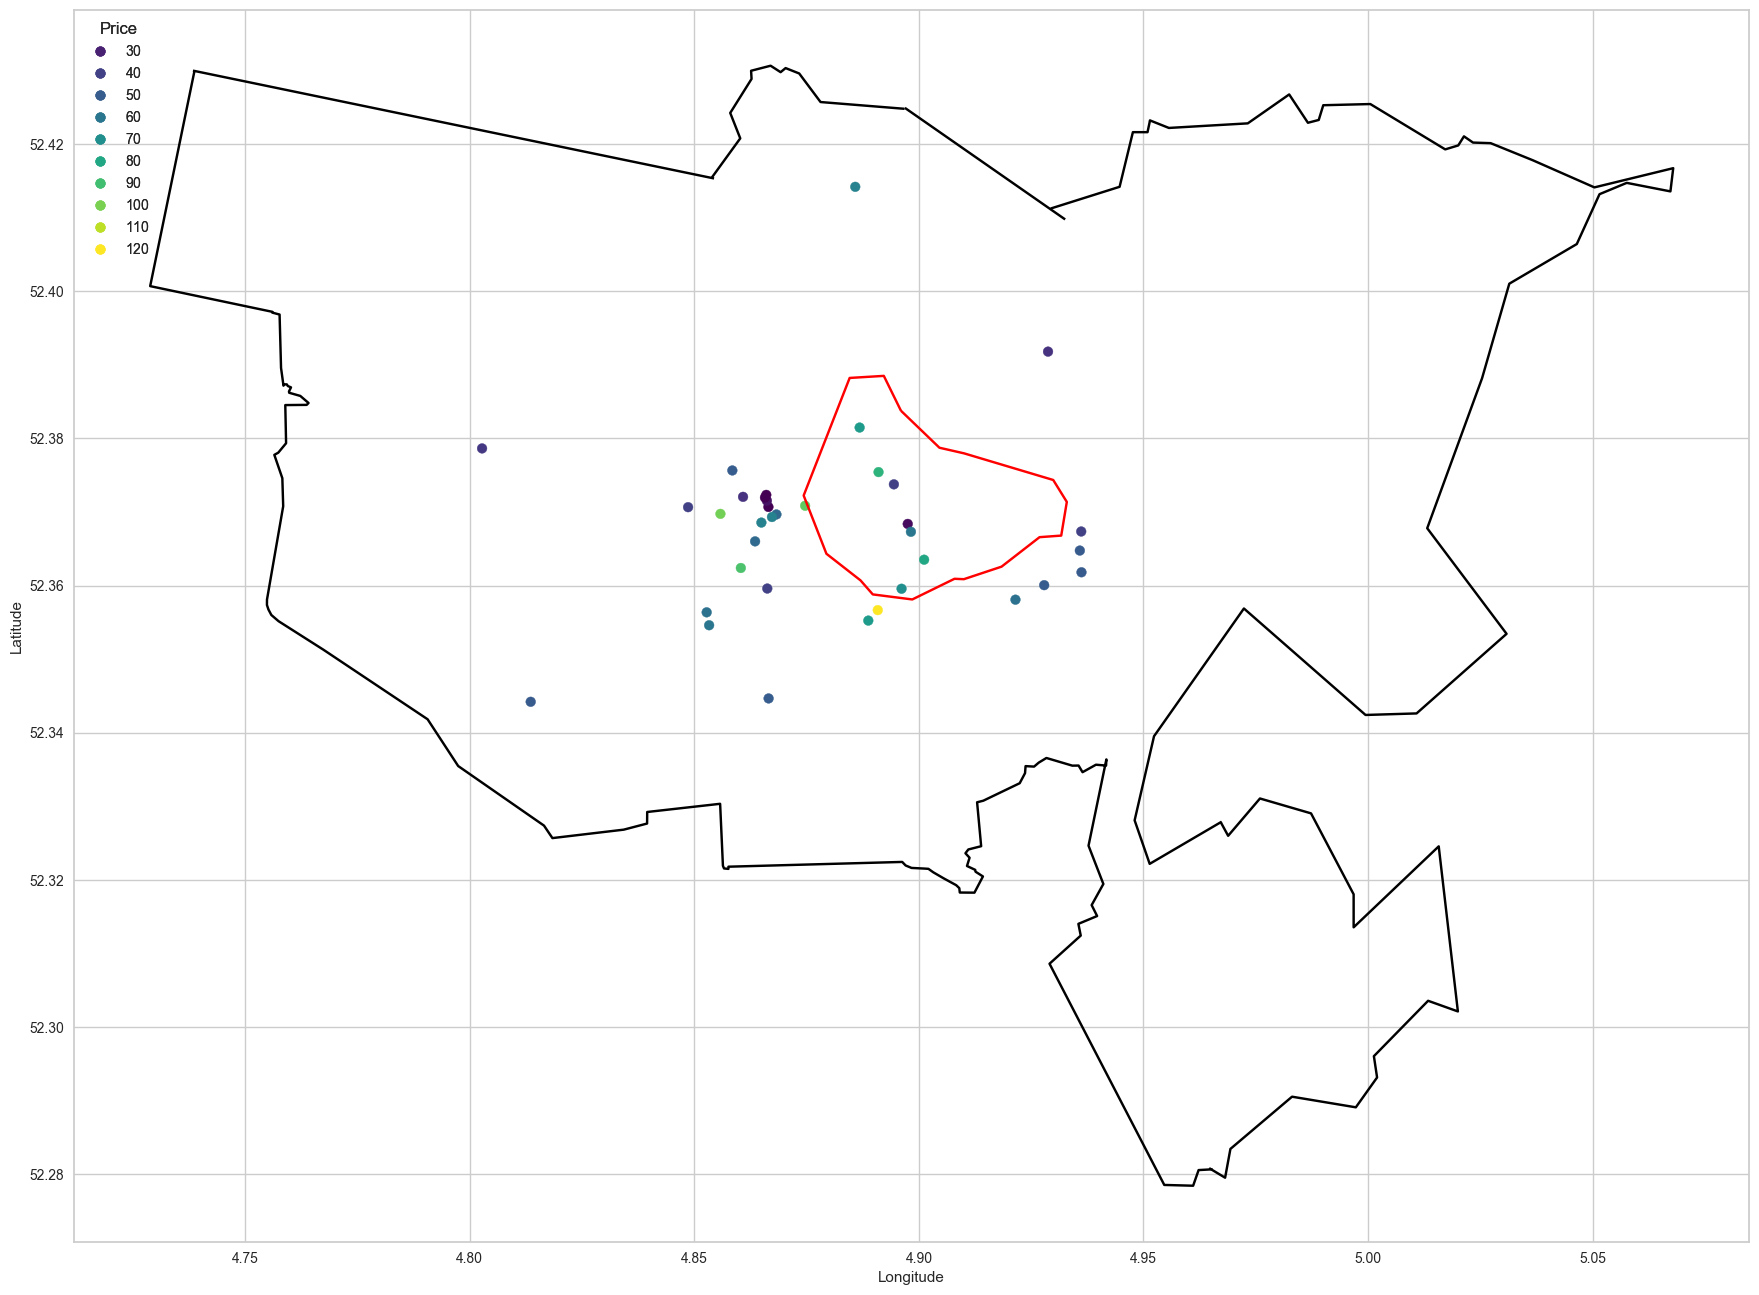

In [383]:
#The coordinates of the house that accommodates less than 2 people, price less than 470, review higher than 95
base = amsterdam.plot(figsize = (25 , 16), color='black', edgecolor='black')

less2 = df[df['accommodates'] < 2]
less470 = less2[less2['price'] < 470]
above95 = less470[less470['review_scores_rating'] > 95]

x = above95['longitude']
y = above95['latitude']
c = above95['price']

scatter = base.scatter(x, y, c=c, cmap='viridis')

# produce a legend with the unique colors from the scatter
legend1 = base.legend(*scatter.legend_elements(),
                    loc="upper left", title="Price")
base.add_artist(legend1)

center.exterior.plot(ax=base, color='red')

#set label for x-axis
base.set_xlabel("Longitude")
  
#set label for y-axis
base.set_ylabel("Latitude")

plt.show()

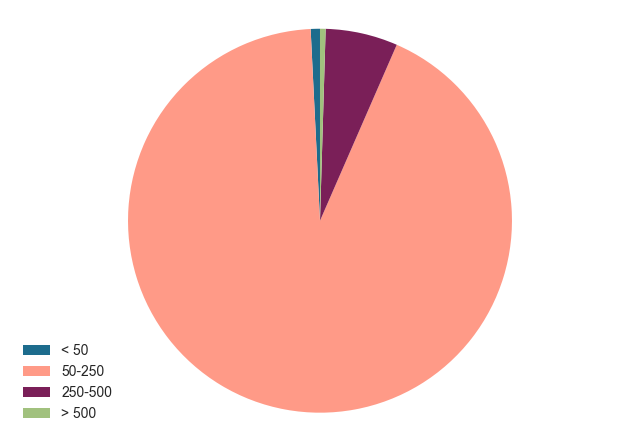

In [362]:
#Comparison Entire home/apt

homeap = df[df['room_type'] == 'Entire home/apt'] 

price_classes = '< 50', '50-250', '250-500', '> 500'

less50 = homeap[homeap['price'] < 50]

aux = homeap[homeap['price'] > 50]
bet50and250 = aux[aux['price'] < 250]

aux = homeap[homeap['price'] > 250]
bet250and500 = aux[aux['price'] < 500]

above500 = homeap[homeap['price'] > 500]

number = [len(less50), len(bet50and250), len(bet250and500), len(above500)]

colors = ['#1d6c8d','#ff9a87','#7a1f58','#a1c17e']

fig1, ax1 = plt.subplots()
ax1.pie(number, startangle = 90, colors=colors)
ax1.axis('equal')

plt.legend(price_classes, loc = 3)

plt.show()

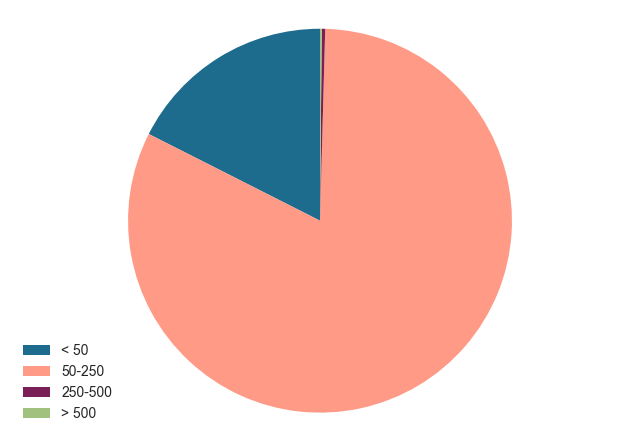

In [363]:
#Comparison Private Room

private = df[df['room_type'] == 'Private room'] 

price_classes = '< 50', '50-250', '250-500', '> 500'

less50 = private[private['price'] < 50]

aux = private[private['price'] > 50]
bet50and250 = aux[aux['price'] < 250]

aux = private[private['price'] > 250]
bet250and500 = aux[aux['price'] < 500]

above500 = private[private['price'] > 500]

number = [len(less50), len(bet50and250), len(bet250and500), len(above500)]

colors = ['#1d6c8d','#ff9a87','#7a1f58','#a1c17e']

fig1, ax1 = plt.subplots()
ax1.pie(number,  startangle = 90, colors=colors)
ax1.axis('equal')

plt.legend(price_classes, loc = 3)

plt.show()

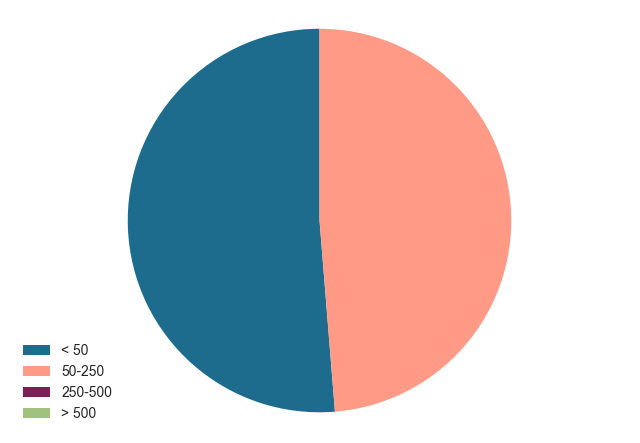

In [364]:
#Comparison Shared Room

shared = df[df['room_type'] == 'Shared room'] 

price_classes = '< 50', '50-250', '250-500', '> 500'

less50 = shared[shared['price'] < 50]

aux = shared[shared['price'] > 50]
bet50and250 = aux[aux['price'] < 250]

aux = shared[shared['price'] > 250]
bet250and500 = aux[aux['price'] < 500]

above500 = shared[shared['price'] > 500]

number = [len(less50), len(bet50and250), len(bet250and500), len(above500)]

colors = ['#1d6c8d','#ff9a87','#7a1f58','#a1c17e']

fig1, ax1 = plt.subplots()
ax1.pie(number, startangle = 90, colors=colors)
ax1.axis('equal')

plt.legend(price_classes, loc = 3)

plt.show()

# Compare Models

In [21]:
#pycaret, to find the best module to use 


#initialize setup
s = setup(data = df, target = 'price', session_id=123)

#compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,36.7696,18072.9586,91.7316,0.4134,0.3703,0.3075,156.1110
en,Elastic Net,40.1664,18567.5508,95.6355,0.3382,0.3995,0.3575,1.3580
lasso,Lasso Regression,38.7239,18540.2089,95.5863,0.3380,0.3872,0.3287,0.7750
lightgbm,Light Gradient Boosting Machine,34.7624,18734.3665,96.5926,0.3143,0.3557,0.2767,0.4060
lr,Linear Regression,43.2066,19043.6236,98.8777,0.2707,0.4321,0.3947,22.5030
rf,Random Forest Regressor,33.2209,19665.8600,97.8965,0.2194,0.3145,0.2522,17.3050
et,Extra Trees Regressor,33.5666,19770.4424,97.9315,0.2164,0.3181,0.2482,33.5160
dt,Decision Tree Regressor,42.1684,19683.8839,102.9136,0.1803,0.3997,0.3133,0.4910
dummy,Dummy Regressor,52.9305,20916.0999,110.9876,-0.0032,0.5102,0.4902,0.0680
llar,Lasso Least Angle Regression,52.9305,20916.0999,110.9876,-0.0032,0.5102,0.4902,0.8990


In [22]:
#check the final params of best model
best.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': False,
 'tol': 0.001,
 'verbose': False}

In [51]:
#create a list of data to be represented in x-axis
models = [ 'br','en' , 'lasso', 'lightgbm', 'lr', 'rf', 'et',
        'dt', 'dummy' ,'llar','gbr', 'ridge', 'knn', 'huber', 'ada', 'omp']
  
#create a list of data to be 
#represented in y-axis
MAE = [36.7696 , 40.1664 , 38.7239 , 34.7624 ,
            43.2066 , 33.2209 , 33.5666, 42.1684, 52.9305, 52.9305,
           34.8692, 50.1152, 58.4678, 74.4990, 122.2301, 69.4200]

MSE = [ 18072.9586 , 18567.5508 , 18540.2089 , 18734.3665 ,
            19043.6236 , 19665.8600, 19770.4424, 19683.8839,
           20916.0999, 20916.0999, 22644.9725, 22168.4178,
           24250.7866, 25594.8223, 35579.0617, 50275.3894]

RMSE = [ 91.7316 , 95.6355 , 95.5863 , 96.5926 ,
            98.8777 , 97.8965 , 97.9315, 102.9136, 110.9876,
        110.9876, 105.6508, 118.8154, 127.2453,133.9729, 171.7310,
       211.9240]

R2 = [ 0.4134 , 0.3382 , 0.3380 , 0.3143 ,
           0.2707 , 0.2194 , 0.2164, 0.1803, -0.0032, -0.0032,
           -0.1495, -0.1495, -0.4785, -0.6630, -2.6561, -4.6765]

RMSLE = [ 0.3703 , 0.3995 , 0.3872 , 0.3557 ,
           0.4321 , 0.3145 , 0.3181, 0.3997, 0.5102,
           0.5102, 0.3361, 0.5793, 0.5461, 1.1794, 0.8427, 0.5859]

MAPE = [ 0.3075 , 0.3575 , 0.3287 , 0.2767 ,
            0.3947 , 0.2522 , 0.2482, 0.3133, 0.4902, 0.4902,
           0.2840, 0.4454, 0.5152, 0.5775, 1.3236, 0.6443]

TT = [ 156.1110 , 1.3580 , 0.7750 , 0.4060 ,
            22.5030 , 17.3050 , 33.5160, 0.4910,0.0680, 0.8990, 9.1130,
           1.3850, 1.6150, 4.4540,21.7870, 1.2460 ]
  
#create a dataframe using the two lists
df_models_MAE = pd.DataFrame(
    { 'models' : models , 'MAE' : MAE })

df_models_MSE = pd.DataFrame(
    { 'models' : models , 'MSE' : MSE })

df_models_RMSE = pd.DataFrame(
    { 'models' : models , 'RMSE' : RMSE })

df_models_R2 = pd.DataFrame(
    { 'models' : models , 'R2' : R2 })

df_models_RMSLE = pd.DataFrame(
    { 'models' : models , 'RMSLE' : RMSLE })

df_models_MAPE = pd.DataFrame(
    { 'models' : models , 'MAPE' : MAPE })

df_models_TT = pd.DataFrame(
    { 'models' : models , 'TT' : TT })

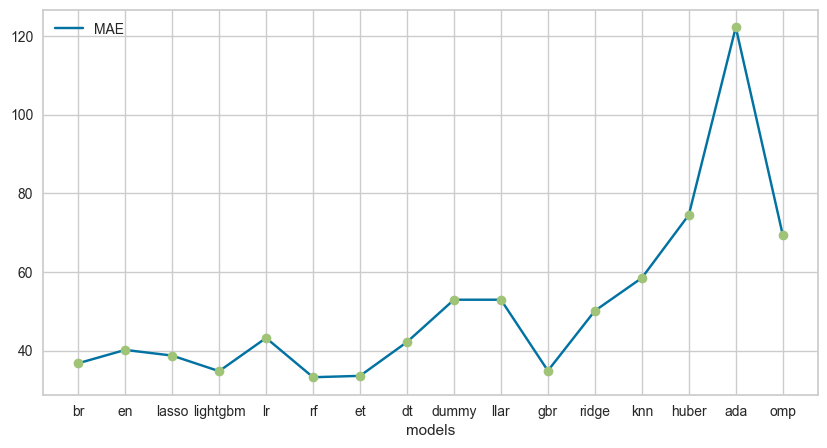

In [52]:
#use plot() method on the dataframe

ax1 = df_models_MAE.plot( 'models' , 'MAE',figsize=(10,5) )
ax1.plot(np.arange(len(models)), MAE, 'o')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models)
plt.show()

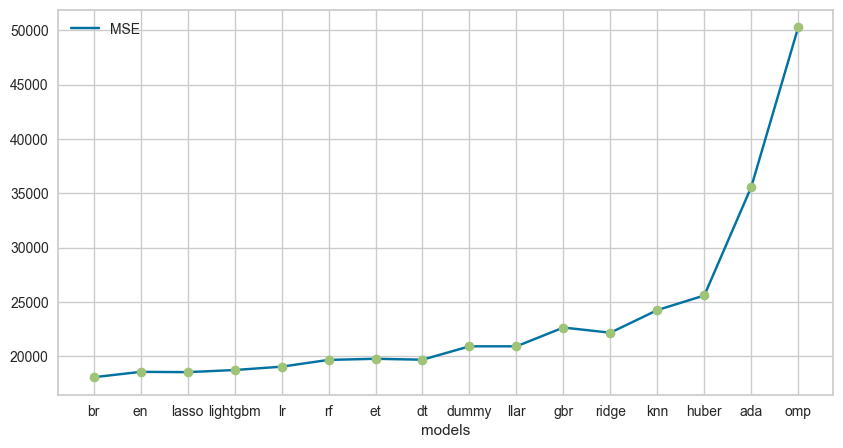

In [53]:
#use plot() method on the dataframe
ax1 = df_models_MSE.plot( 'models' , 'MSE',figsize=(10, 5) )
ax1.plot(np.arange(len(models)), MSE, 'o')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models)
plt.show()


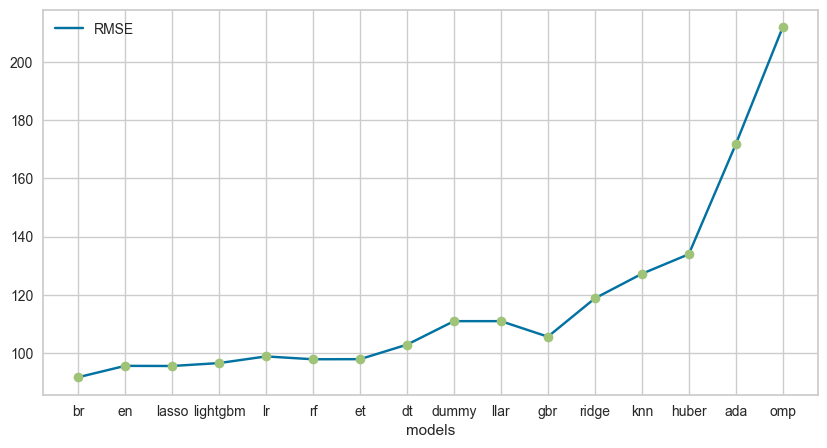

In [54]:
#use plot() method on the dataframe
ax1 = df_models_RMSE.plot( 'models' , 'RMSE',figsize=(10,5) )
ax1.plot(np.arange(len(models)), RMSE, 'o')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models)
plt.show()

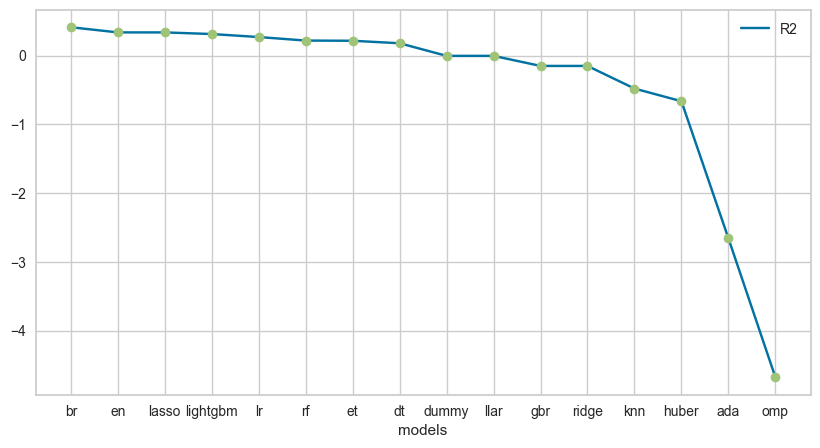

In [55]:
#use plot() method on the dataframe
ax1 = df_models_R2.plot( 'models' , 'R2',figsize=(10, 5) )
ax1.plot(np.arange(len(models)), R2, 'o')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models)
plt.show()

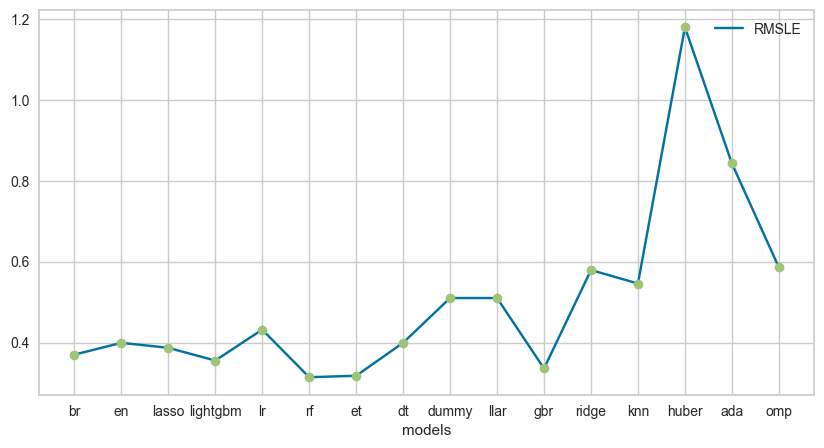

In [56]:
#use plot() method on the dataframe
ax1 = df_models_RMSLE.plot( 'models' , 'RMSLE',figsize=(10, 5) )
ax1.plot(np.arange(len(models)), RMSLE, 'o')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models)
plt.show()

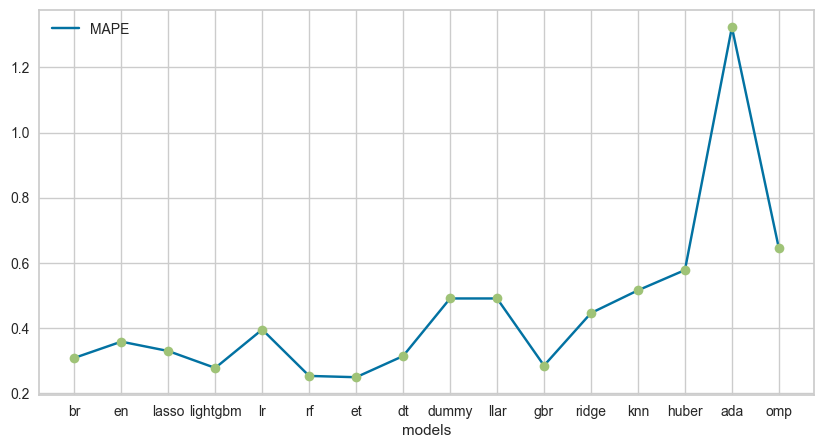

In [57]:
#use plot() method on the dataframe
ax1 = df_models_MAPE.plot( 'models' , 'MAPE',figsize=(10, 5) )
ax1.plot(np.arange(len(models)), MAPE, 'o')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models)
plt.show()

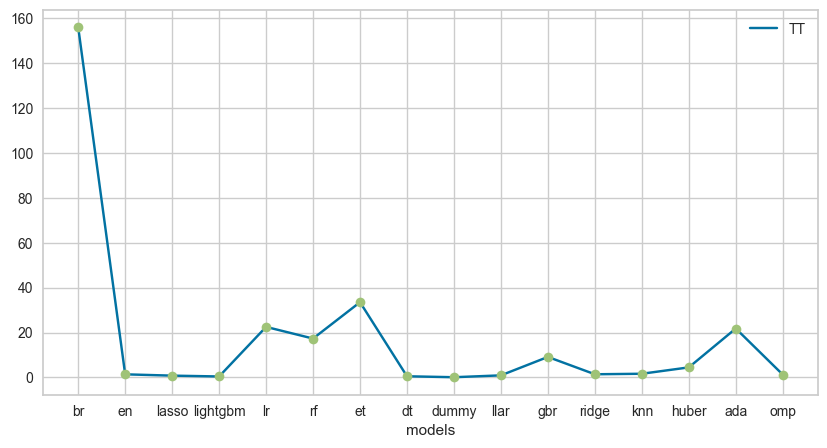

In [58]:
#use plot() method on the dataframe
ax1 = df_models_TT.plot( 'models' , 'TT',figsize=(10, 5) )
ax1.plot(np.arange(len(models)), TT, 'o')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models)
plt.show()